In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
nyc = pd.read_csv('train.csv')

In [54]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [52]:
nyc.shape

(50000, 9)

In [26]:
def haversine(phi_1, phi_2, lambda_1, lambda_2, radius=6371):
    
    phi_1, phi_2 = np.radians(phi_1), np.radians(phi_2)
    lambda_1, lambda_2 = np.radians(lambda_1), np.radians(lambda_2)
    
    distance = 2*radius*np.arcsin(np.sqrt(np.sin((phi_2-phi_1)/2)**2+np.cos(phi_1)*np.cos(phi_2)*np.sin((lambda_2-lambda_1)/2)**2))
    
    return distance

In [27]:
%%time


dists = [ ]

for i, row in nyc.iterrows():
    
    dists.append(haversine(row['pickup_latitude'], row['dropoff_latitude'], row['pickup_longitude'], row['dropoff_longitude']))

    nyc['distance'] = dists

CPU times: user 6.53 s, sys: 7.72 ms, total: 6.54 s
Wall time: 6.54 s


In [31]:
%%time


dists = [ ]

for row in nyc.itertuples():
    
    dists.append(haversine(row.pickup_latitude, row.dropoff_latitude, row.pickup_longitude, row.dropoff_longitude))
    
nyc['distance'] = dists

CPU times: user 1.13 s, sys: 7.83 ms, total: 1.14 s
Wall time: 1.14 s


In [33]:
%%time

nyc['distance'] = nyc[['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude']] \
                 .apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)

CPU times: user 2.24 s, sys: 7.84 ms, total: 2.25 s
Wall time: 2.25 s


In [40]:
longest = np.max(nyc['distance'])

In [43]:
%%time

nyc['distance'] = haversine(nyc['pickup_latitude'], nyc['dropoff_latitude'], nyc['pickup_longitude'], nyc['dropoff_longitude'])

CPU times: user 24.8 ms, sys: 27 µs, total: 24.8 ms
Wall time: 23.6 ms


In [44]:
%%time

nyc['distance'] = haversine(nyc['pickup_latitude'].values, nyc['dropoff_latitude'].values, nyc['pickup_longitude'].values, nyc['dropoff_longitude'].values)

CPU times: user 25.9 ms, sys: 3.94 ms, total: 29.8 ms
Wall time: 58.8 ms


In [55]:
nyc.query('(dropoff_longitude == 0) & (dropoff_latitude == 0)').sort_values('distance')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.000000,0.000000,0.0,0.0,3,0.000000
32818,2011-05-06 18:34:00.00000081,6.9,2011-05-06 18:34:00 UTC,0.000000,0.000000,0.0,0.0,1,0.000000
32827,2009-04-19 18:14:37.0000006,2.9,2009-04-19 18:14:37 UTC,0.000000,0.000000,0.0,0.0,1,0.000000
32841,2010-12-03 22:02:00.000000215,7.7,2010-12-03 22:02:00 UTC,0.000000,0.000000,0.0,0.0,5,0.000000
32898,2013-03-12 02:50:00.0000004,5.0,2013-03-12 02:50:00 UTC,0.000000,0.000000,0.0,0.0,2,0.000000
...,...,...,...,...,...,...,...,...,...
46463,2012-11-14 23:02:00.00000038,5.5,2012-11-14 23:02:00 UTC,-74.003090,40.727855,0.0,0.0,5,8667.134816
8647,2014-03-27 18:01:00.00000071,21.5,2014-03-27 18:01:00 UTC,-74.001808,40.750782,0.0,0.0,1,8667.497512
37798,2013-08-28 12:11:00.00000087,22.5,2013-08-28 12:11:00 UTC,-74.004465,40.741823,0.0,0.0,1,8667.534293
31823,2013-11-26 18:12:00.000000179,52.0,2013-11-26 18:12:00 UTC,-74.005490,40.739532,0.0,0.0,1,8667.572331


In [61]:
nyc.query('dropoff_longitude == 0 | dropoff_latitude == 0').nunique()

key                  958
fare_amount          147
pickup_datetime      958
pickup_longitude      44
pickup_latitude       45
dropoff_longitude      1
dropoff_latitude       4
passenger_count        7
distance              45
dtype: int64

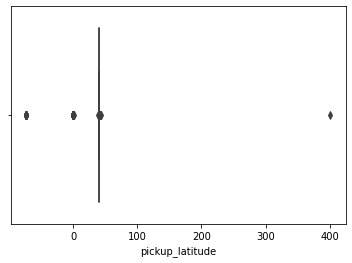

In [62]:
sns.boxplot(x= nyc['pickup_latitude']) 

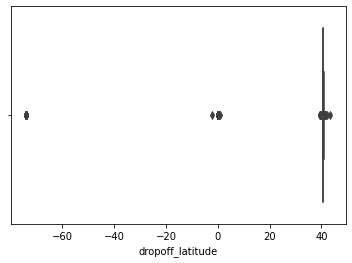

In [63]:
sns.boxplot(x= nyc['dropoff_latitude'])

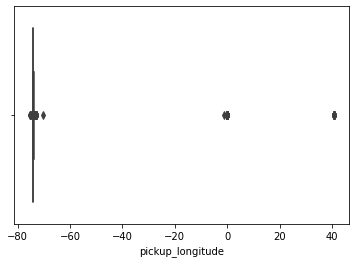

In [64]:
sns.boxplot(x=nyc['pickup_longitude'])

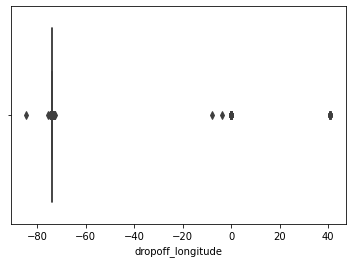

In [65]:
sns.boxplot(x=nyc['dropoff_longitude'])

In [67]:
nyc.query('(10 < pickup_latitude < 120) & (pickup_longitude < -60) & (10 < dropoff_latitude) & (dropoff_longitude < -60) & (distance < 50)') \
.sort_values('distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.00,2014-02-22 02:44:00 UTC,-73.989540,40.757032,-73.860580,41.147487,1,44.746988
12349,2010-05-01 15:23:00.00000097,104.67,2010-05-01 15:23:00 UTC,-73.797225,40.639720,-73.840545,41.030892,1,43.648755
649,2009-09-19 10:34:41.0000002,66.30,2009-09-19 10:34:41 UTC,-74.438233,40.993260,-74.185996,40.693874,2,39.476975
6308,2010-08-23 11:06:00.000000121,45.00,2010-08-23 11:06:00 UTC,-73.422692,40.747012,-73.870317,40.773160,1,37.812945
18656,2009-12-08 12:58:00.00000033,49.57,2009-12-08 12:58:00 UTC,-73.781842,40.644690,-74.177562,40.695237,5,33.844445
...,...,...,...,...,...,...,...,...,...
31060,2010-10-14 19:33:00.000000253,4.90,2010-10-14 19:33:00 UTC,-73.982855,40.735333,-73.982855,40.735333,1,0.000000
31041,2012-11-30 13:46:02.0000004,11.50,2012-11-30 13:46:02 UTC,-73.983847,40.738317,-73.983847,40.738317,1,0.000000
31024,2010-11-28 02:45:00.000000134,14.50,2010-11-28 02:45:00 UTC,-73.896035,40.761718,-73.896035,40.761718,5,0.000000
30923,2011-11-09 20:39:08.0000001,60.50,2011-11-09 20:39:08 UTC,-74.036185,40.742231,-74.036185,40.742231,1,0.000000


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
